In [1]:
#basic package
import json
import tqdm
import os
import numpy as np
import glob
import pandas as pd
import sys
import shutil
import time
import datetime as dt
import itertools
import time
import re
from collections import Counter
from collections import defaultdict
import operator
import math
from operator import itemgetter
import functools
import collections

#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from UTILS import preprocessing_broiler_breeder, verification_based_on_initial_record, general_cleaning, \
cleaning_mouvement_records, time_series_henColumn_tsRow, ZoneVariable, HenVariable, print_color,\
boxplot_distribution_entropy, heatmap_duration_perzone_perhen, simple_cleaning_experiment2
import config_breeder_boiler as config

we restrict the time series to one value per 60 seconds 
we compute the complexity variables each 30 minutes 
each variables includes the values of at least the last 120.00 minutes (i.e. are using 120.00 values)


# Define parameters

In [3]:
print('change the configuration file if not done yet!')
path_extracted_data = config.path_extracted_data
id_run = config.id_run
dico_matching = config.dico_matching
li_nbr_block_repetition = config.li_nbr_block_repetition

change the configuration file if not done yet!


# Variables at Hen and Zone level

In [4]:
#for being more reproductible, we open the file that was saved from cleaning
df_ts = pd.read_csv(os.path.join(path_extracted_data, id_run+'_TimeSeries_.csv'), sep=';', parse_dates=['Timestamp', 'day']) 
print(df_ts.shape)
print(min(df_ts['Timestamp']), max(df_ts['Timestamp']))
df_ts.head(3)

(2739247, 104)
2019-07-08 07:05:53 2019-08-23 23:59:59


,Timestamp,hen_10A,hen_10B,hen_10C,hen_10F,hen_10H,hen_10L,hen_10M,hen_10S,hen_10V,...,hen_9F,hen_9H,hen_9L,hen_9M,hen_9S,hen_9V,hen_9X,day,hour,date_toberemoved
0,2019-07-08 07:05:53,Rampe,Einstreu,Rampe,B Box,B Box,B Box,Einstreu,Einstreu,A Box,...,Einstreu,Einstreu,Einstreu,Einstreu,Einstreu,Einstreu,Einstreu,2019-07-08,7,False
1,2019-07-08 07:05:54,Rampe,Einstreu,Rampe,B Box,B Box,B Box,Einstreu,Einstreu,A Box,...,Einstreu,Einstreu,Einstreu,Einstreu,Einstreu,Einstreu,Einstreu,2019-07-08,7,False
2,2019-07-08 07:05:55,Rampe,Einstreu,Rampe,B Box,B Box,B Box,Einstreu,Einstreu,A Box,...,Einstreu,Einstreu,Einstreu,Einstreu,Einstreu,Einstreu,Einstreu,2019-07-08,7,False


### level=day

In [5]:
ts_name = 'time_serie_day'

----------------- total duration per Zone....
The number of hours per "level" period is of:


Zone,verification_daily_total_nbr_hour,level,HenID
0,8.901944,"[2019-07-08 00:00:00, 2019-07-08 00:00:00, 201...","[hen_10A, hen_10B, hen_10C, hen_10F, hen_10H, ..."
1,13.000000,"[2019-07-11 00:00:00, 2019-07-12 00:00:00, 201...","[hen_10A, hen_10A, hen_10A, hen_10A, hen_10A, ..."


----------------- first time stamp in each zone per day....
----------------- number of Zone (excluding nan)....
----------------- compute some variables based on a list of zones over a day....


C:\Users\camil\Desktop\animals_code\AVIFORUM\UTILS.py:1936: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  df_ = df[~df['Zone'].isnull()].groupby(['HenID','level'])['Zone'].agg(function2apply).reset_index()


several max-duration-zone
several max-duration-zone
several max-duration-zone
several max-duration-zone
----------------- Compute Chi2 distance....


c:\users\camil\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Total running time: 34.00 mn


  0%|                                                                                           | 0/32 [00:00<?, ?it/s]

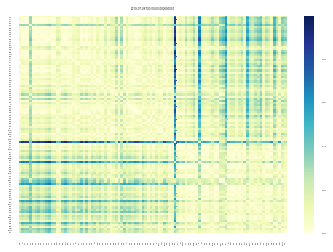

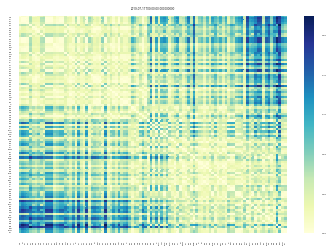

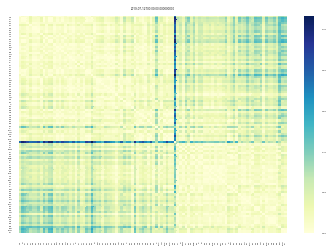

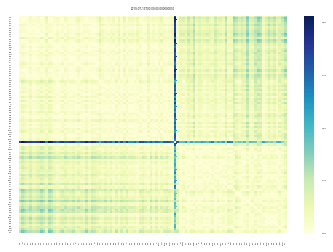

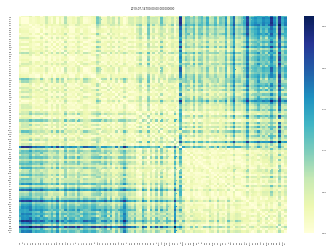

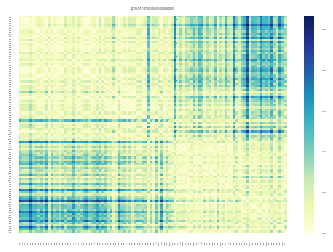

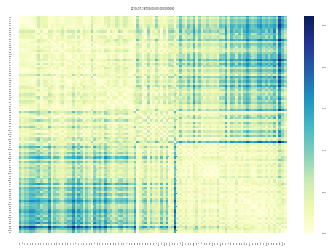

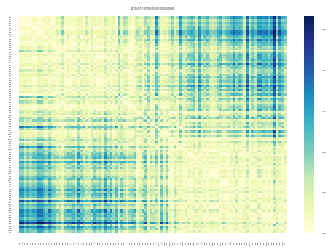

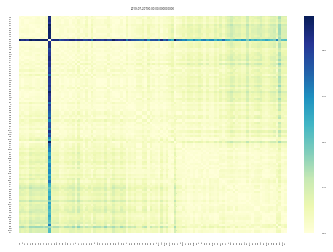

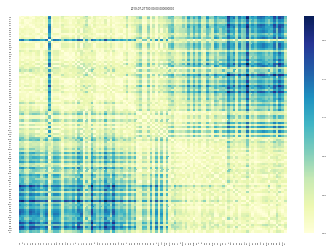

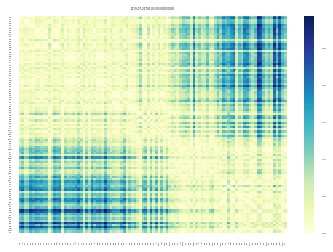

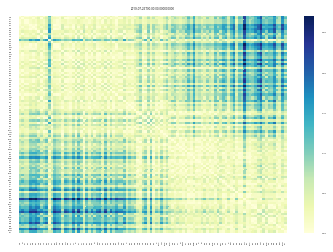

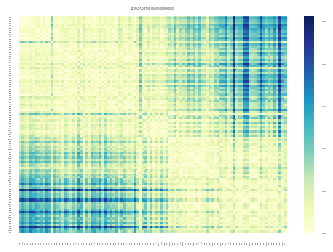

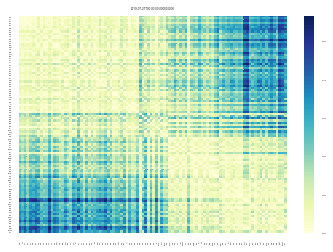

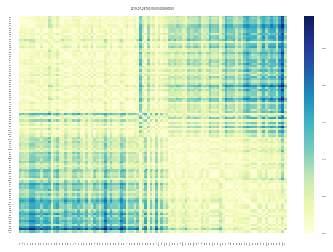

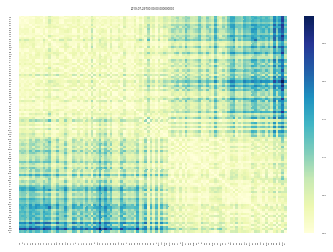

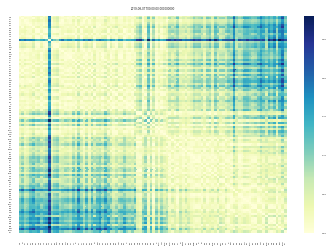

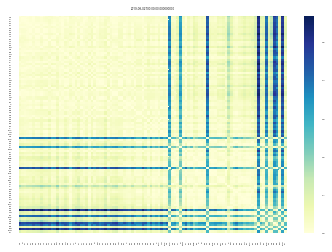

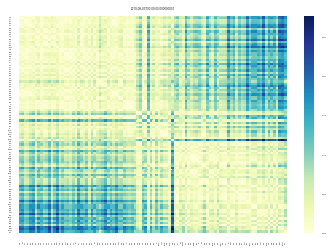

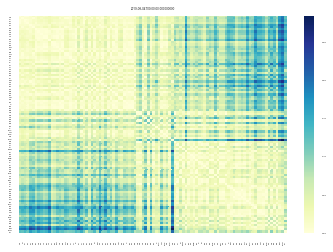

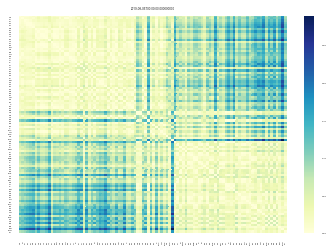

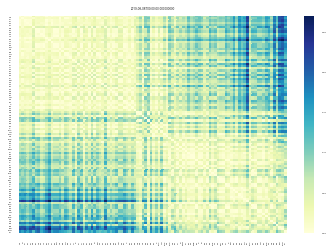

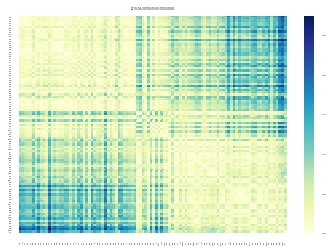

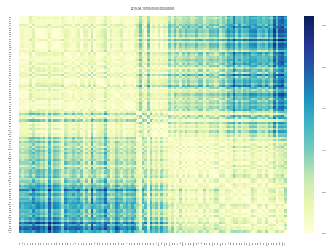

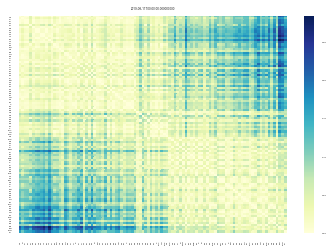

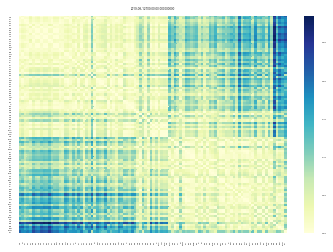

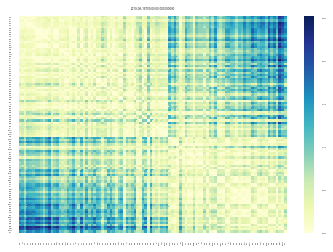

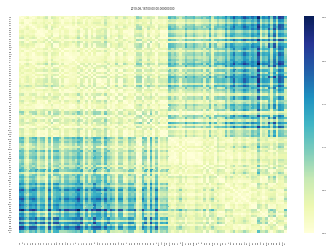

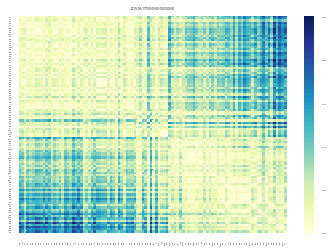

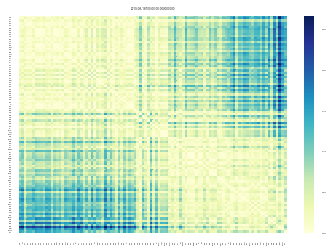

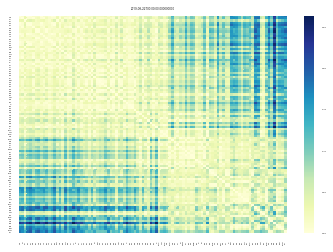

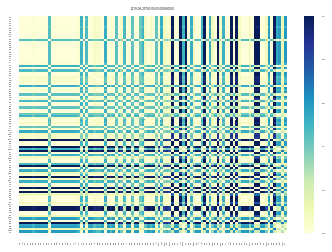

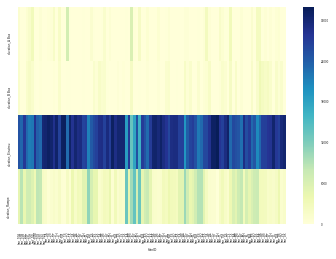

  3%|██▌                                                                                | 1/32 [00:28<14:50, 28.73s/it]

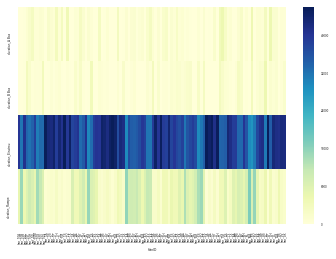

  6%|█████▏                                                                             | 2/32 [00:30<10:20, 20.69s/it]

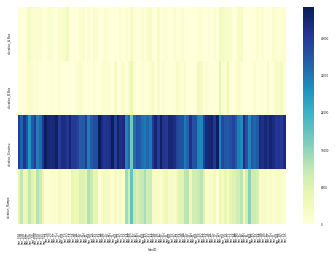

  9%|███████▊                                                                           | 3/32 [00:32<07:17, 15.08s/it]

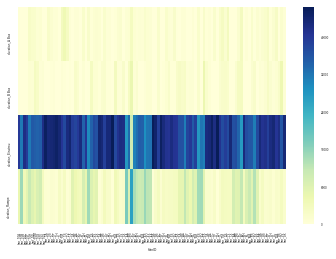

 12%|██████████▍                                                                        | 4/32 [00:34<05:14, 11.24s/it]

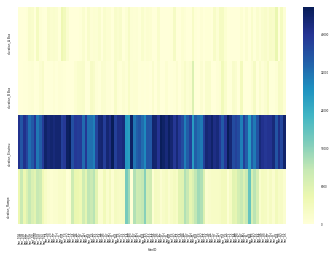

 16%|████████████▉                                                                      | 5/32 [00:36<03:48,  8.46s/it]

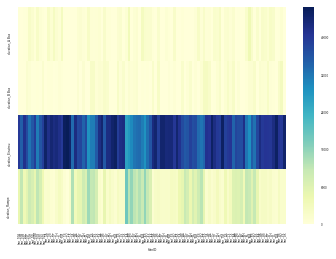

 19%|███████████████▌                                                                   | 6/32 [00:38<02:50,  6.54s/it]

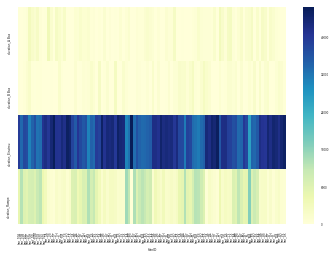

 22%|██████████████████▏                                                                | 7/32 [00:41<02:09,  5.19s/it]

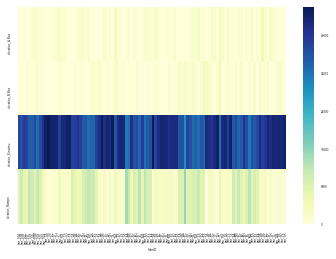

 25%|████████████████████▊                                                              | 8/32 [00:43<01:44,  4.36s/it]

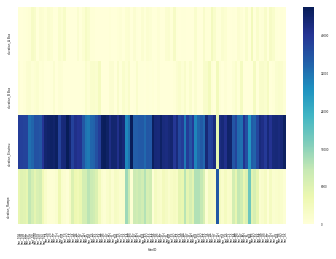

 28%|███████████████████████▎                                                           | 9/32 [00:45<01:25,  3.70s/it]

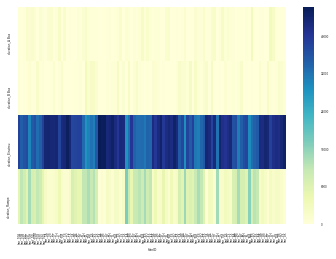

 31%|█████████████████████████▋                                                        | 10/32 [00:47<01:09,  3.14s/it]

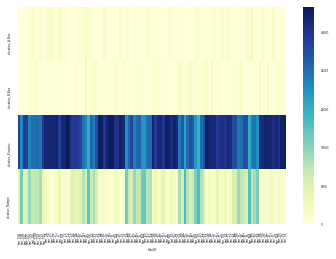

 34%|████████████████████████████▏                                                     | 11/32 [00:49<00:57,  2.73s/it]

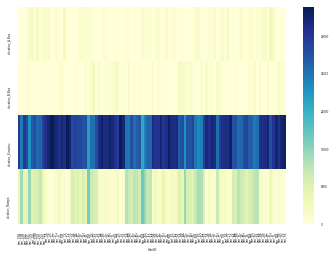

 38%|██████████████████████████████▊                                                   | 12/32 [00:50<00:48,  2.45s/it]

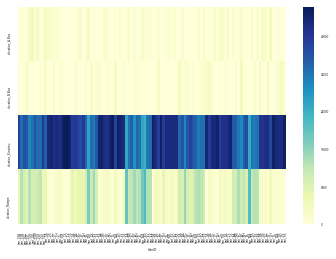

 41%|█████████████████████████████████▎                                                | 13/32 [00:53<00:44,  2.32s/it]

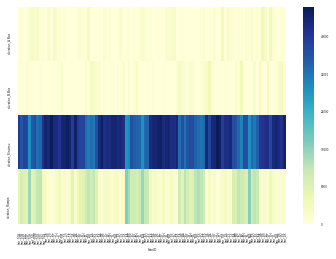

 44%|███████████████████████████████████▉                                              | 14/32 [00:55<00:41,  2.28s/it]

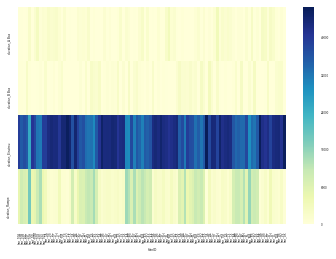

 47%|██████████████████████████████████████▍                                           | 15/32 [00:57<00:36,  2.14s/it]

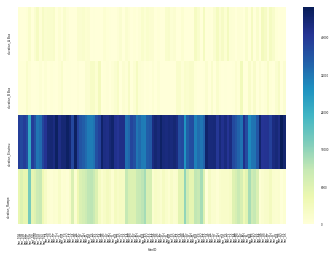

 50%|█████████████████████████████████████████                                         | 16/32 [00:58<00:32,  2.04s/it]

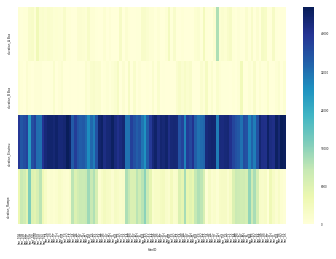

 53%|███████████████████████████████████████████▌                                      | 17/32 [01:01<00:31,  2.12s/it]

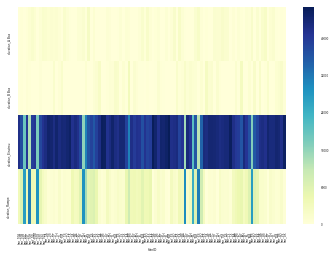

 56%|██████████████████████████████████████████████▏                                   | 18/32 [01:02<00:28,  2.01s/it]

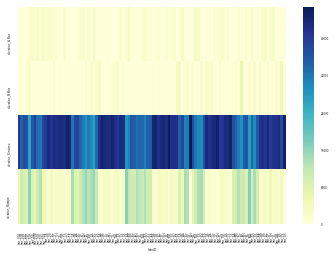

 59%|████████████████████████████████████████████████▋                                 | 19/32 [01:04<00:25,  1.98s/it]

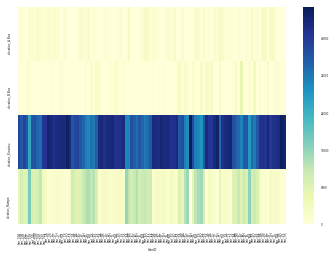

 62%|███████████████████████████████████████████████████▎                              | 20/32 [01:07<00:25,  2.13s/it]

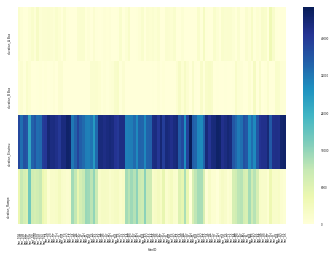

 66%|█████████████████████████████████████████████████████▊                            | 21/32 [01:09<00:23,  2.15s/it]

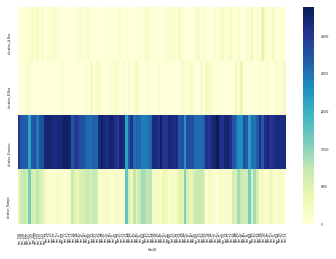

 69%|████████████████████████████████████████████████████████▍                         | 22/32 [01:11<00:21,  2.14s/it]

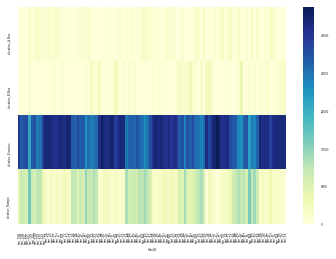

 72%|██████████████████████████████████████████████████████████▉                       | 23/32 [01:13<00:19,  2.13s/it]

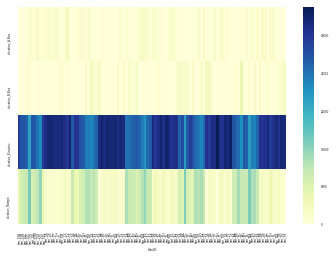

 75%|█████████████████████████████████████████████████████████████▌                    | 24/32 [01:15<00:16,  2.11s/it]

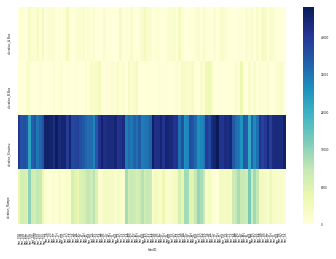

 78%|████████████████████████████████████████████████████████████████                  | 25/32 [01:18<00:15,  2.18s/it]

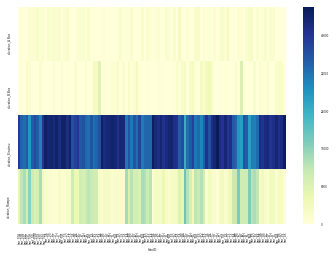

 81%|██████████████████████████████████████████████████████████████████▋               | 26/32 [01:19<00:12,  2.09s/it]

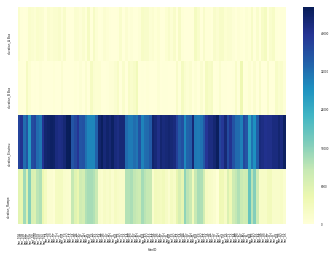

 84%|█████████████████████████████████████████████████████████████████████▏            | 27/32 [01:21<00:09,  1.98s/it]

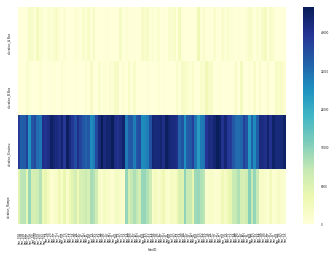

 88%|███████████████████████████████████████████████████████████████████████▊          | 28/32 [01:23<00:07,  1.96s/it]

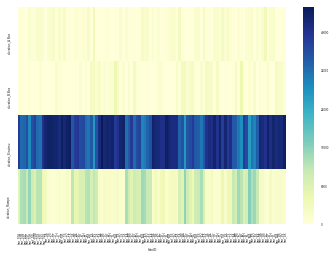

 91%|██████████████████████████████████████████████████████████████████████████▎       | 29/32 [01:25<00:05,  1.98s/it]

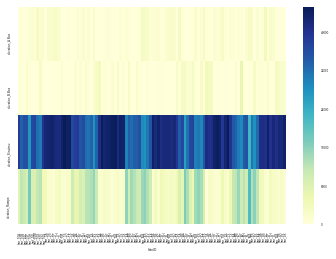

 94%|████████████████████████████████████████████████████████████████████████████▉     | 30/32 [01:27<00:03,  1.98s/it]

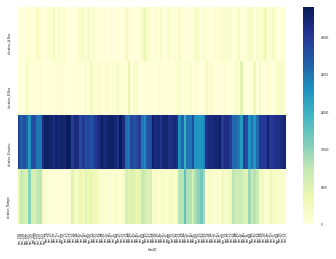

 97%|███████████████████████████████████████████████████████████████████████████████▍  | 31/32 [01:29<00:01,  1.98s/it]

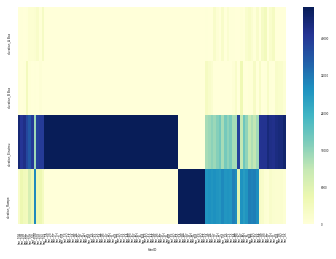

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [07:22<00:00, 14.11s/it]


Total running time: 8.23 mn
(3200, 30)


,HenID,level,duration_A Box,duration_B Box,duration_Einstreu,duration_Rampe,verification_daily_total_duration,dur_values,dur_values_normalized,FirstTimestamp_A Box,...,Average_duration,Variance_duration,dico_zone_duration,Total_number_transition,distribution_entropy,nbr_bouts_Rampe,nbr_bouts_Einstreu,nbr_bouts_A Box,nbr_bouts_B Box,Max_duration_zone_4
0,hen_10A,2019-07-08,935.0,1304.0,24990.0,4818.0,32047.0,"[935.0, 1304.0, 24990.0, 4818.0]","[0.029175897899959436, 0.040690236215558395, 0...",2019-07-08 07:12:44,...,102.714744,73226.017988,"{'Rampe': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",311,0.712230,150,56,69,37,0
1,hen_10A,2019-07-11,114.0,0.0,40148.0,6538.0,46800.0,"[114.0, 0.0, 40148.0, 6538.0]","[0.002435897435897436, 0.0, 0.8578632478632479...",2019-07-11 06:15:25,...,374.400000,257283.888000,"{'Rampe': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,...",124,0.421144,61,56,8,0,0
2,hen_10A,2019-07-12,359.0,141.0,39737.0,6563.0,46800.0,"[359.0, 141.0, 39737.0, 6563.0]","[0.007670940170940171, 0.003012820512820513, 0...",2019-07-12 03:59:54,...,314.093960,324939.816675,"{'Einstreu': [1, 1, 1, 2, 2, 2, 2, 4, 20, 43, ...",148,0.469242,74,45,24,6,0


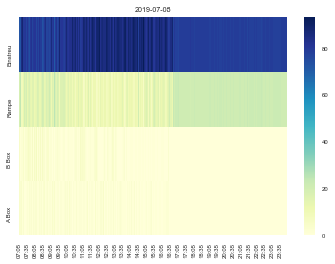

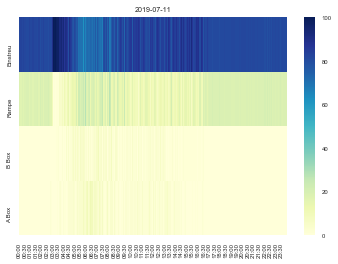

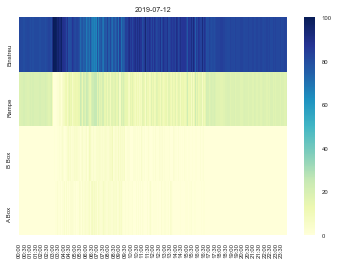

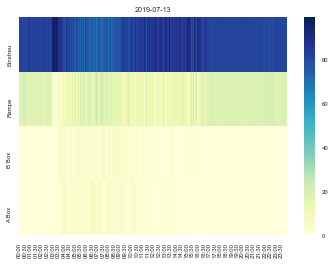

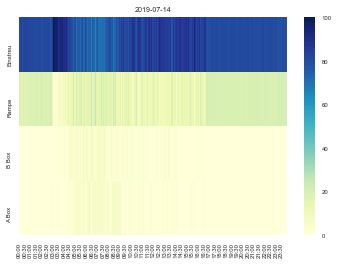

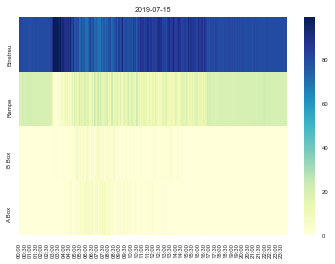

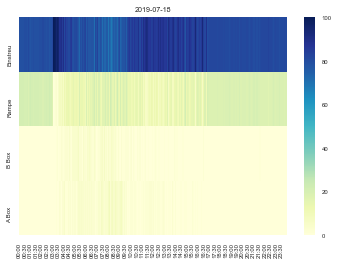

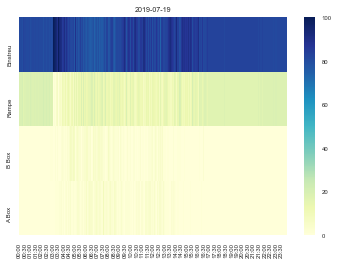

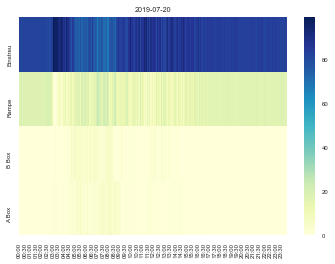

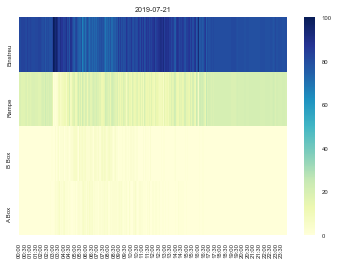

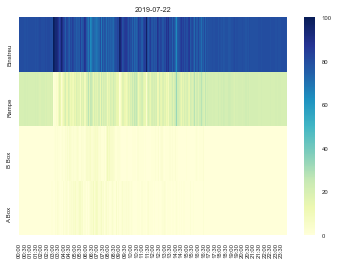

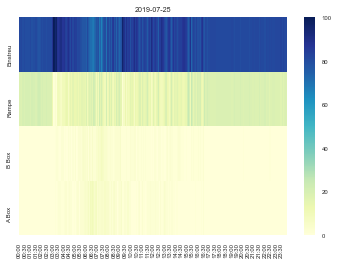

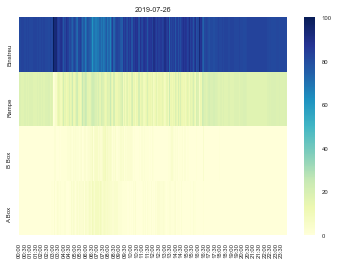

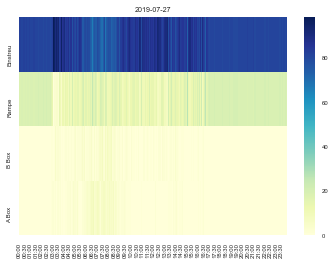

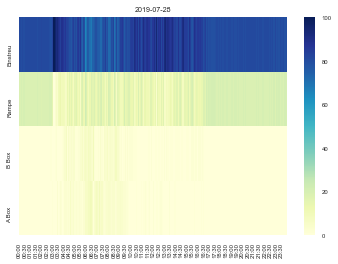

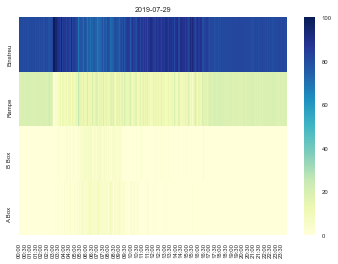

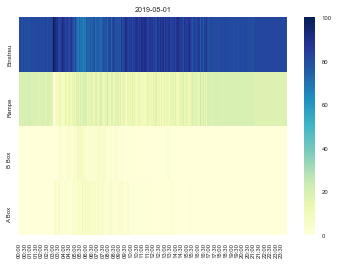

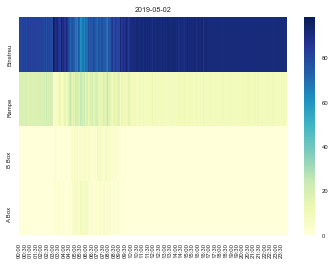

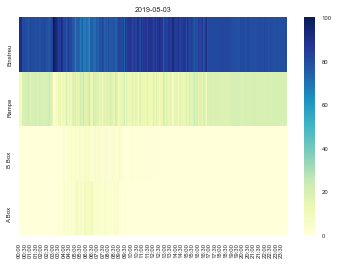

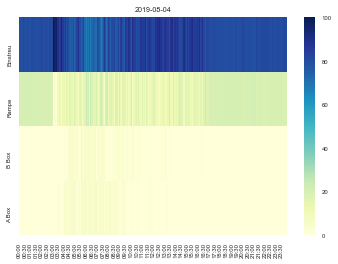

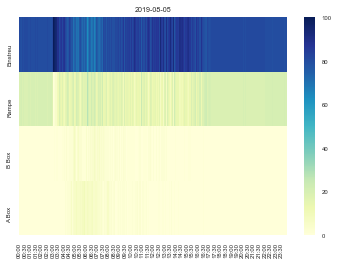

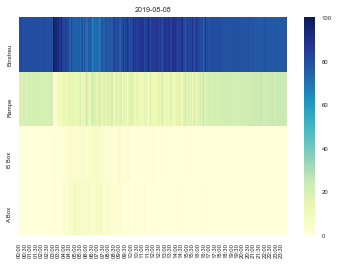

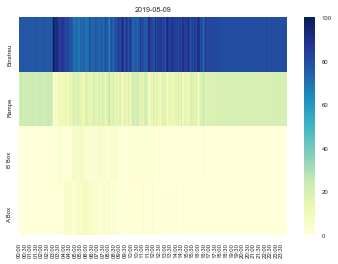

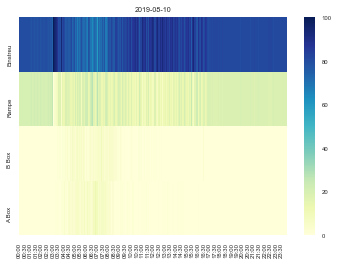

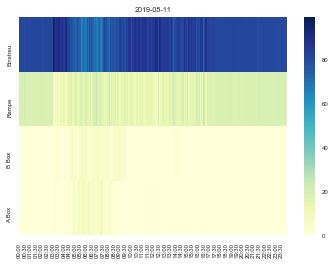

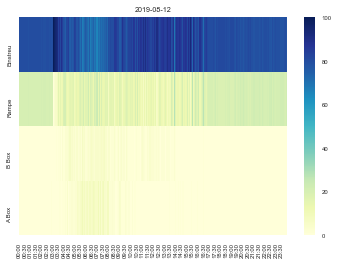

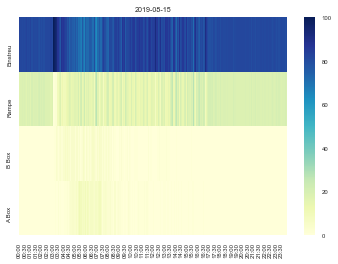

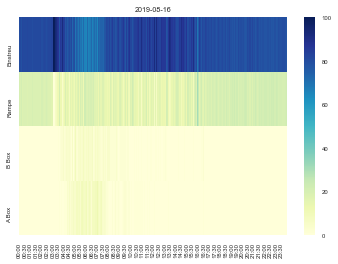

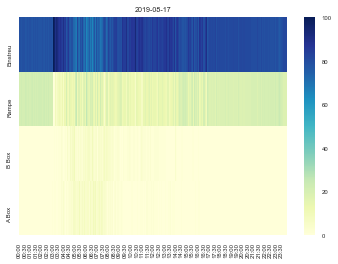

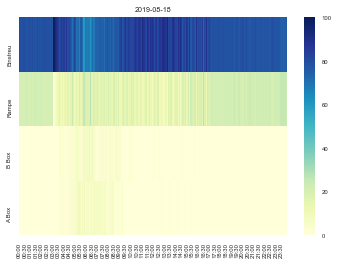

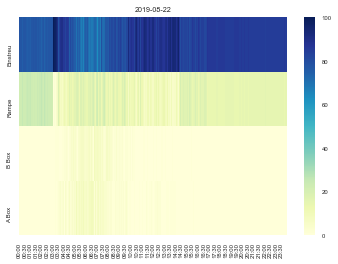

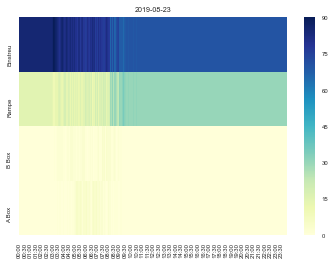

In [6]:
#daily
df_daily = HenVariable(df_ts, config, ts_name, compute_chi2_distance=True, save=True, time4entropy=False)
heatmap_duration_perzone_perhen(df_daily, config) #TODO: clean interzones once cleaning finished
#boxplot_distribution_entropy(df_daily, ts_name, config)
ZoneVariable(df_ts, config)
print(df_daily.shape)
df_daily.head(3)

### level=night

In [7]:
ts_name = 'time_serie_night'

#nightly
df_nightly = HenVariable(df_ts, config, ts_name)
heatmap_duration_perzone_perhen(df_nightly, config) #TODO: clean interzones once cleaning finished
#boxplot_distribution_entropy(df_nightly, ts_name, config) 
ZoneVariable(df_ts, config)
print(df_nightly.shape)
df_nightly.head(3)